<a href="https://colab.research.google.com/github/OletiKavya/PetApparelSizingAnalysis/blob/main/PetApparel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas nltk scikit-learn

In [10]:
import pandas as pd

# Load data
df = pd.read_csv('DogApparel.csv')



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36778 entries, 0 to 36777
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             36778 non-null  int64 
 1   title              36778 non-null  object
 2   text               36778 non-null  object
 3   images             36778 non-null  object
 4   asin               36778 non-null  object
 5   parent_asin        36778 non-null  object
 6   user_id            36778 non-null  object
 7   timestamp          36778 non-null  object
 8   helpful_vote       36778 non-null  int64 
 9   verified_purchase  36778 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 2.6+ MB


In [24]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,cleaned_text,sentiment,sizing_issue,product_type
0,5,"As always, ruffwear delivers",In my experience ruffwear is always top of the...,[],B079J22K9D,B079J22K9D,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2022-04-25 13:15:03.331,2,True,experi ruffwear alway top line come dog produc...,positive,too_small,Other
1,4,Soft!,These fleece pajamas are very soft. I really l...,[],B0B815BGC9,B0B81X6ZWR,AHV6QCNBJNSGLATP56JAWJ3C4G2A,2022-12-11 23:22:49.118,0,False,fleec pajama soft realli like grey pink color ...,positive,too_small,Other
2,5,Happily surprised with this product and would ...,Wowza ! I was hopeful when ordering but blown ...,[],B01ACBHMEI,B07RGX97VG,AH5ZBPCVWAAGJCOPLXMFXD7PGIJQ,2020-02-06 04:04:16.807,2,True,wowza hope order blown away upon use product t...,positive,no_issue,Other
3,3,"Nice coat, poor quality velcro",I love the design and warmth of these coats (I...,[],B01M1BEGPK,B01M1BEGPK,AELUAIPM6U33VDQ4MVQYGTBQT6VA,2019-03-06 23:03:17.872,2,True,love design warmth coat one 2 small dog use 2 ...,negative,too_small,Coat
4,5,Healthy dog food for large or small dogs. My d...,"I’m impressed with this dog food.<br />No Soy,...",[],B07DPLXNGF,B08NXCR695,AHJQPUQLSQZE6LMIUMY7WNRXCQQQ,2019-03-31 06:11:54.774,0,False,im impress dog foodbr soy wheat corn artifici ...,positive,too_small,Other


In [25]:
df.describe()

,rating,helpful_vote
count,36778.000000,36778.000000
mean,4.521045,2.647425
std,1.031049,23.491528
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1606.000000


In [26]:
df.isnull().sum()

,0
rating,0
title,0
text,0
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [27]:
df.tail()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,cleaned_text,sentiment,sizing_issue,product_type
36773,5,A must have for double coated and any long hai...,I have tried multiple shedding/combing brushes...,[],B07TWG1WM4,B0BCR1QTGS,AGRM735IYGZMKLDCOIZRXBZVFIEQ,2023-06-06 00:09:35.172,0,True,tri multipl sheddingcomb brush dog thought ost...,positive,no_issue,Coat
36774,5,Did great job on one dog bought second for my ...,I have brother and sister border collies. My m...,[],B07BQTWCRT,B07BQTWCRT,AGSLVKTKK4JADVCKG3MOFOUESUIA,2019-02-04 08:06:12.701,0,True,brother sister border colli male long silki ha...,negative,no_issue,Other
36775,5,Works on all types of dog coats,Arrived yesterday pulled it out of the box and...,[],B09ZTMMXTK,B09ZTMMXTK,AFA4YYPNN22PYEGC3ZJBL5CCGZ6A,2023-04-13 11:18:31.149,7,True,arriv yesterday pull box immedi start use amou...,positive,too_small,Coat
36776,3,Return dog sweaters,I would like to return these duplicate dog swe...,[],B08C9GJH6Z,B08C9LM595,AHCM56VPX57KUZCTA4V3L4L7XFSA,2020-12-27 02:32:46.841,0,True,would like return duplic dog sweater order error,neutral,no_issue,Sweater
36777,5,Really good natural pet shampoo for my 2 cats ...,"I have two cats, 4 and 6, and a 11 year old do...",[],B07BW9N341,B07BW9N341,AFIDMLWNAG7M7VE3BSP7YAJPVVQA,2018-11-27 22:41:39.091,0,True,two cat 4 6 11 year old dog look natur dog sha...,positive,no_issue,Other


In [29]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


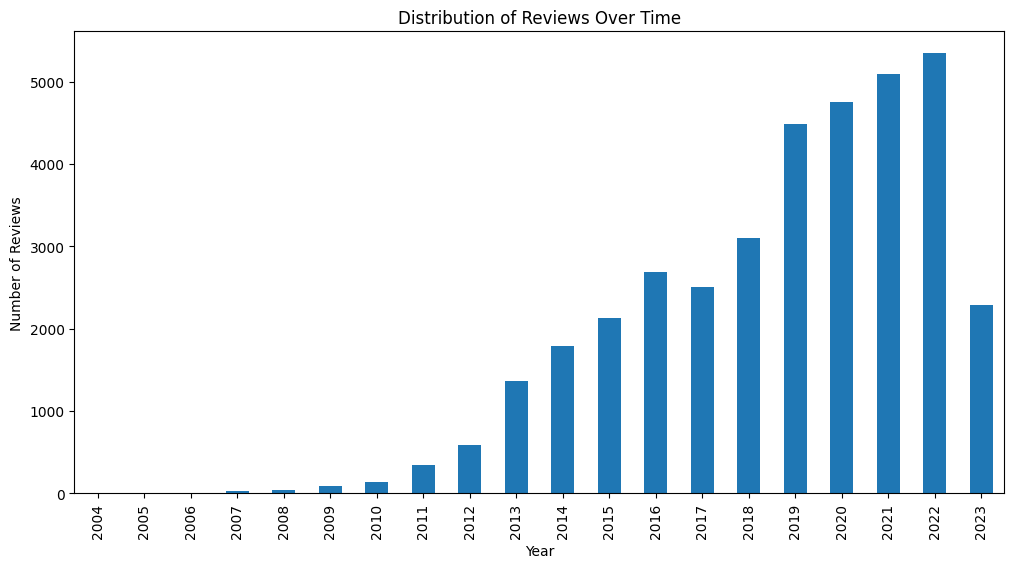

In [31]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Distribution of reviews over time
df['year'] = df['timestamp'].dt.year
review_counts = df.groupby('year').size()

plt.figure(figsize=(12, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


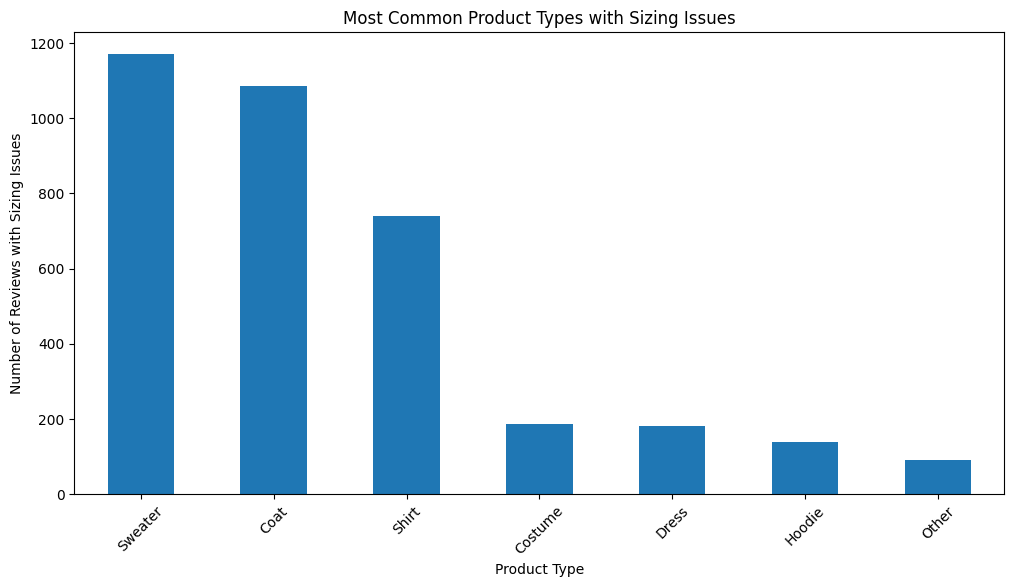

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Define common sizing issues
sizing_issues = {
    'too_small': ['small', 'tight', 'too small'],
    'too_large': ['large', 'loose', 'too large'],
    'fits_poorly': ['does not fit well', 'fits poorly', 'not fit'],
    'inconsistent_sizing': ['inconsistent sizing', 'size varies', 'different size'],
    'unspecified': ['size', 'fit', 'return','exchange']  # General mentions of size issues
}

# Function to classify sizing issues
def classify_sizing_issue(text):
    text = text.lower()
    for issue, keywords in sizing_issues.items():
        if any(keyword in text for keyword in keywords):
            return issue
    return 'no_issue'

# Apply function to classify sizing issues
df['sizing_issue'] = df['title'].apply(classify_sizing_issue)

# Function to extract product type from title
def extract_product_type(title):
    if 'sweater' in title.lower():
        return 'Sweater'
    elif 'coat' in title.lower():
        return 'Coat'
    elif 'hoodie' in title.lower():
        return 'Hoodie'
    elif 'dress' in title.lower():
        return 'Dress'
    elif 'shirt' in title.lower():
        return 'Shirt'
    elif 'costume' in title.lower():
        return 'Costume'
    elif 'raincoat' in title.lower():
        return 'Raincoat'
    else:
        return 'Other'

# Apply function to get product types
df['product_type'] = df['text'].apply(extract_product_type)

# Filter reviews mentioning sizing issues
sizing_issues_df = df[df['sizing_issue'] != 'no_issue']

# Count the occurrences of each product type with sizing issues
product_type_counts = sizing_issues_df['product_type'].value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
product_type_counts.plot(kind='bar')
plt.title('Most Common Product Types with Sizing Issues')
plt.xlabel('Product Type')
plt.ylabel('Number of Reviews with Sizing Issues')
plt.xticks(rotation=45)
plt.show()



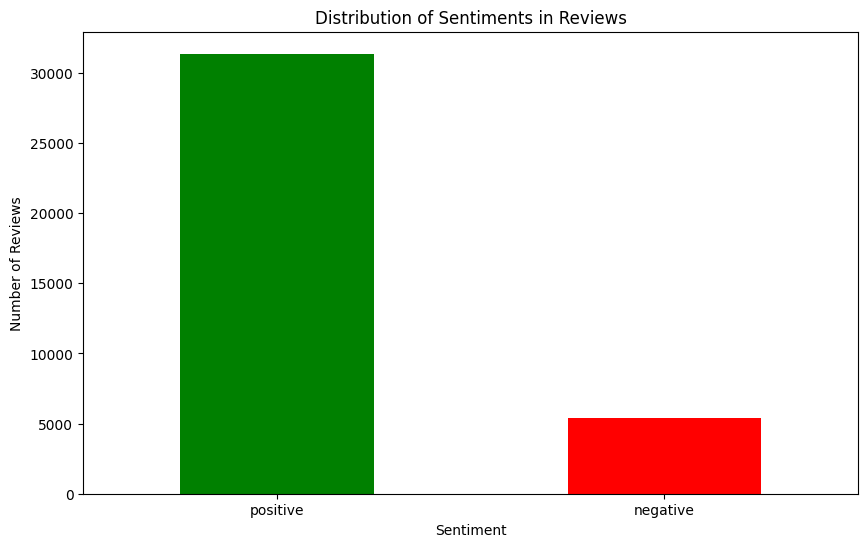

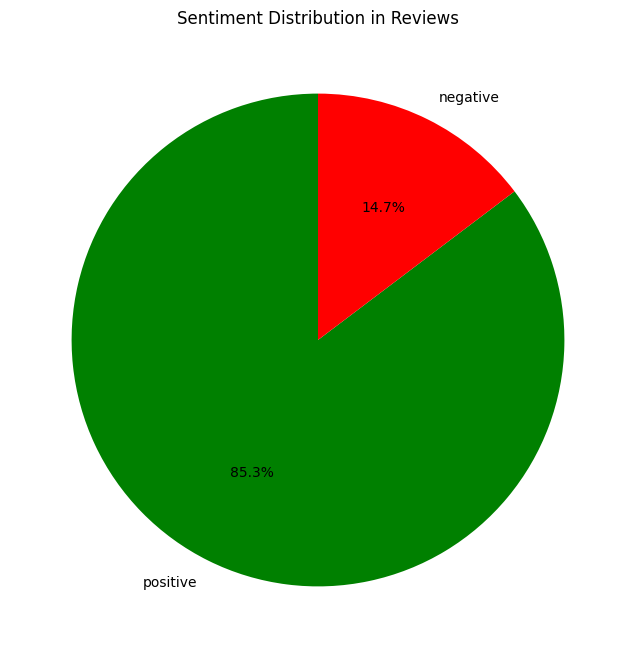

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob



# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    else:
        return 'negative'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the results - Bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Plot the results - Pie chart
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Sentiment Distribution in Reviews')
plt.ylabel('')
plt.show()


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample labeling for sizing issues
df['sizing_issue'] = df['cleaned_text'].apply(lambda x: 'too_small' if 'small' in x else ('too_large' if 'large' in x else 'no_issue'))

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sizing_issue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9265905383360522


In [43]:
returns_exchanges = df[df['text'].str.contains('return|exchange', case=False, na=False)]


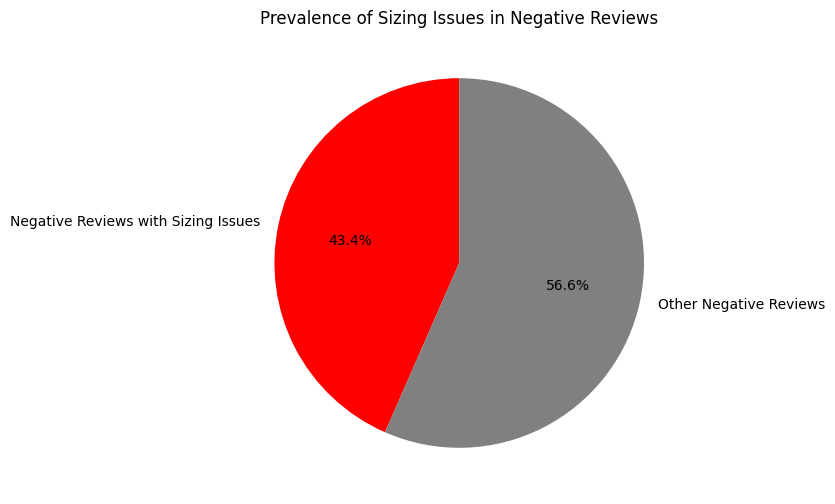

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Define common sizing issues
sizing_issues = {
    'too_small': ['small', 'tight', 'too small'],
    'too_large': ['large', 'loose', 'too large'],
    'fits_poorly': ['does not fit well', 'fits poorly', 'not fit'],
    'inconsistent_sizing': ['inconsistent sizing', 'size varies', 'different size'],
    'unspecified': ['size', 'fit']  # General mentions of size issues
}

# Function to classify sizing issues
def classify_sizing_issue(text):
    text = text.lower()
    for issue, keywords in sizing_issues.items():
        if any(keyword in text for keyword in keywords):
            return issue
    return 'no_issue'

# Apply function to classify sizing issues
df['sizing_issue'] = df['cleaned_text'].apply(classify_sizing_issue)

# Filter reviews mentioning sizing issues
sizing_issues_df = df[df['sizing_issue'] != 'no_issue']

# Prevalence of Sizing Issues in Negative Reviews
negative_reviews = df[df['sentiment'] == 'negative']
negative_reviews_with_sizing_issues = negative_reviews[negative_reviews['sizing_issue'] != 'no_issue']

# Plot the results
plt.figure(figsize=(10, 6))
sizes = [len(negative_reviews_with_sizing_issues), len(negative_reviews) - len(negative_reviews_with_sizing_issues)]
labels = ['Negative Reviews with Sizing Issues', 'Other Negative Reviews']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'gray'], startangle=90)
plt.title('Prevalence of Sizing Issues in Negative Reviews')
plt.show()




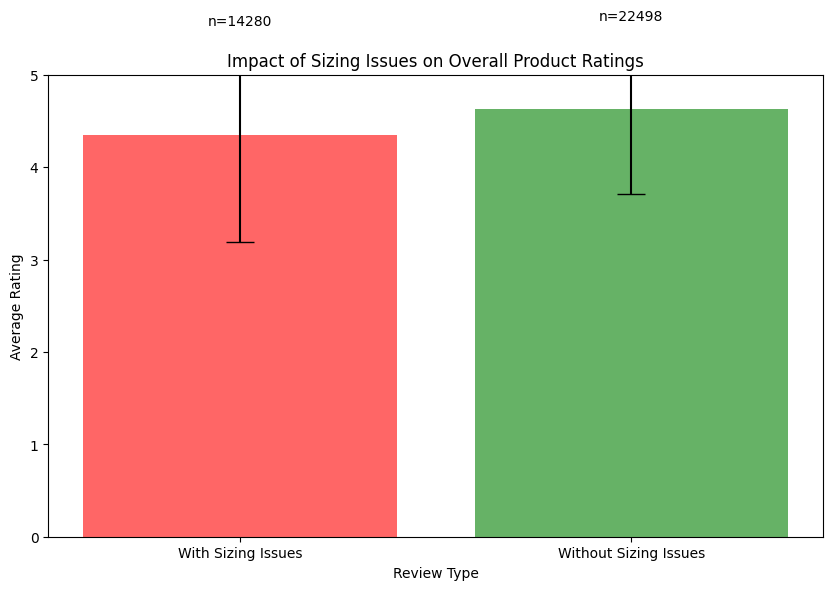

In [46]:
# Calculate average ratings and standard deviations
average_rating_with_sizing_issues = sizing_issues_df['rating'].mean()
std_rating_with_sizing_issues = sizing_issues_df['rating'].std()

average_rating_without_sizing_issues = df[df['sizing_issue'] == 'no_issue']['rating'].mean()
std_rating_without_sizing_issues = df[df['sizing_issue'] == 'no_issue']['rating'].std()

# Get counts of reviews in each category
count_with_sizing_issues = sizing_issues_df.shape[0]
count_without_sizing_issues = df[df['sizing_issue'] == 'no_issue'].shape[0]

# Plot the results
plt.figure(figsize=(10, 6))

# Bar plot with error bars
plt.bar(['With Sizing Issues', 'Without Sizing Issues'],
        [average_rating_with_sizing_issues, average_rating_without_sizing_issues],
        yerr=[std_rating_with_sizing_issues, std_rating_without_sizing_issues],
        color=['red', 'green'], alpha=0.6, capsize=10)

# Add counts on top of the bars
plt.text(0, average_rating_with_sizing_issues + std_rating_with_sizing_issues, f'n={count_with_sizing_issues}', ha='center', va='bottom')
plt.text(1, average_rating_without_sizing_issues + std_rating_without_sizing_issues, f'n={count_without_sizing_issues}', ha='center', va='bottom')

# Titles and labels
plt.title('Impact of Sizing Issues on Overall Product Ratings')
plt.xlabel('Review Type')
plt.ylabel('Average Rating')
plt.ylim(0, 5)

# Show the plot
plt.show()

In [48]:
import seaborn as sns

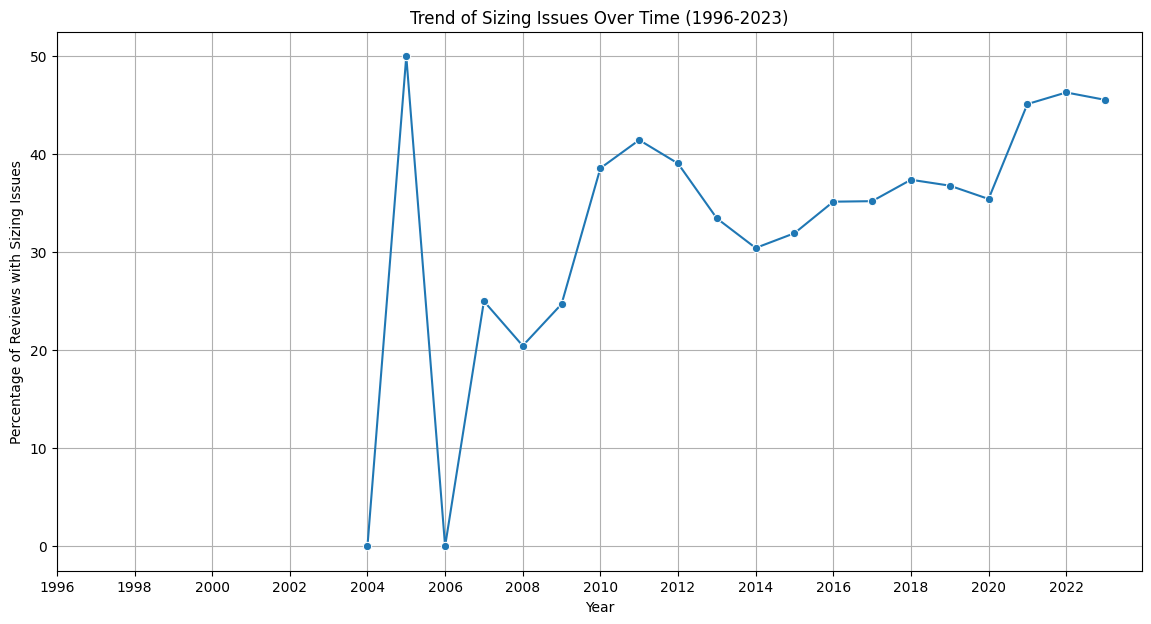

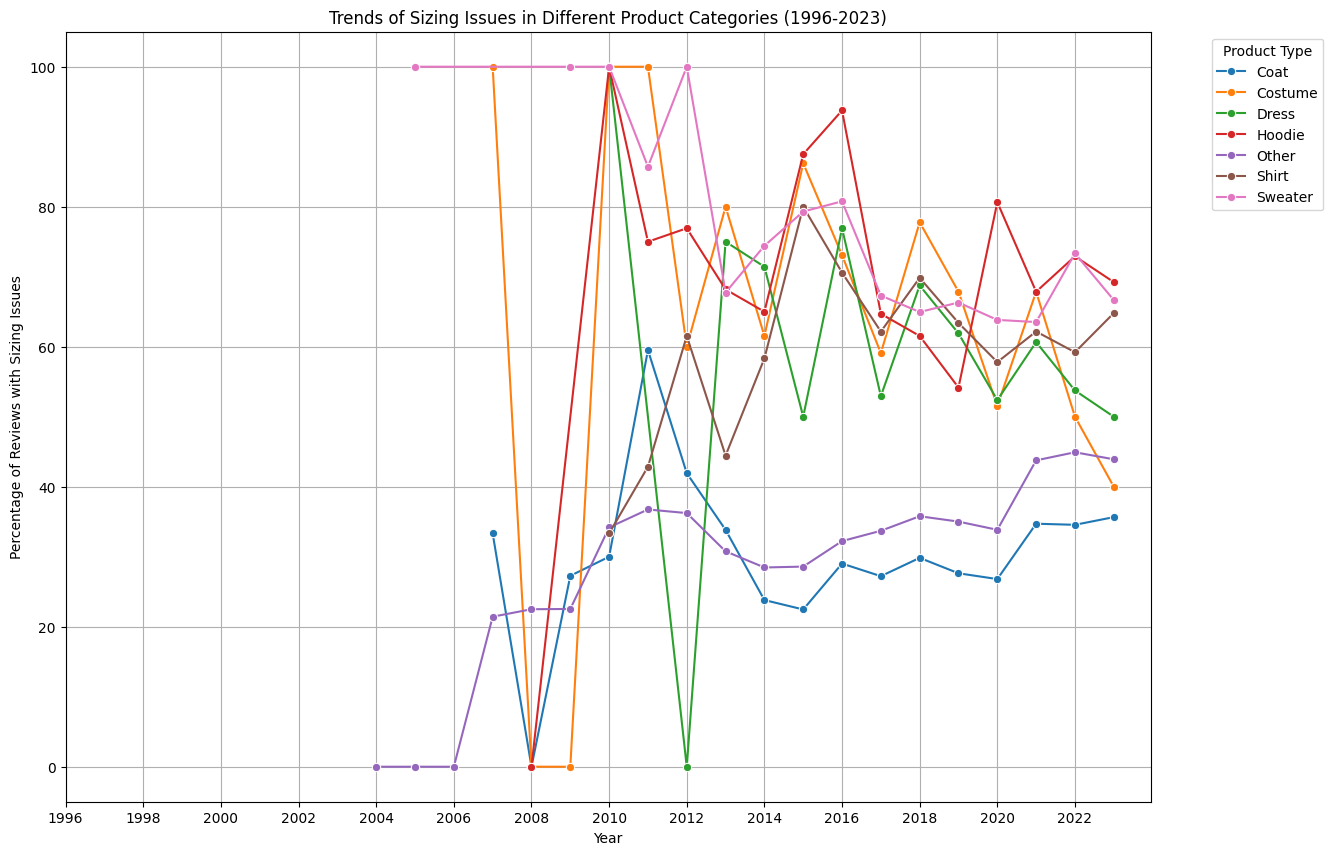

In [51]:
#Trend Analysis:
# Extract year from timestamp
df['year'] = pd.to_datetime(df['timestamp']).dt.year

# Group by year and calculate percentage of reviews with sizing issues
yearly_sizing_issues = df.groupby('year').apply(
    lambda x: (x['sizing_issue'] != 'no_issue').sum() / x.shape[0] * 100
).reset_index(name='percent_sizing_issues')

# Plot trend of sizing issues over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_sizing_issues, x='year', y='percent_sizing_issues', marker='o')
plt.title('Trend of Sizing Issues Over Time (1996-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews with Sizing Issues')
plt.xticks(range(1996, 2024, 2))  # Adjust the range as needed
plt.grid(True)
plt.show()

# Analyze improvements or persistent problems in specific product categories
def extract_product_type(title):
    title = title.lower()
    if 'sweater' in title:
        return 'Sweater'
    elif 'coat' in title:
        return 'Coat'
    elif 'hoodie' in title:
        return 'Hoodie'
    elif 'dress' in title:
        return 'Dress'
    elif 'shirt' in title:
        return 'Shirt'
    elif 'costume' in title:
        return 'Costume'
    elif 'raincoat' in title:
        return 'Raincoat'
    else:
        return 'Other'

# Apply function to get product types
df['product_type'] = df['title'].apply(extract_product_type)

# Group by product type and year to analyze trends
product_type_trends = df.groupby(['product_type', 'year']).apply(
    lambda x: (x['sizing_issue'] != 'no_issue').sum() / x.shape[0] * 100
).reset_index(name='percent_sizing_issues')

# Plot trends for each product type
plt.figure(figsize=(14, 10))
sns.lineplot(data=product_type_trends, x='year', y='percent_sizing_issues', hue='product_type', marker='o')
plt.title('Trends of Sizing Issues in Different Product Categories (1996-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews with Sizing Issues')
plt.xticks(range(1996, 2024, 2))  # Adjust the range as needed
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-59-0f272e364305>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_rating_df['return_mention'] = low_rating_df['text'].apply(classify_return_mentions)


Percentage of low rating reviews mentioning returns: 18.04%


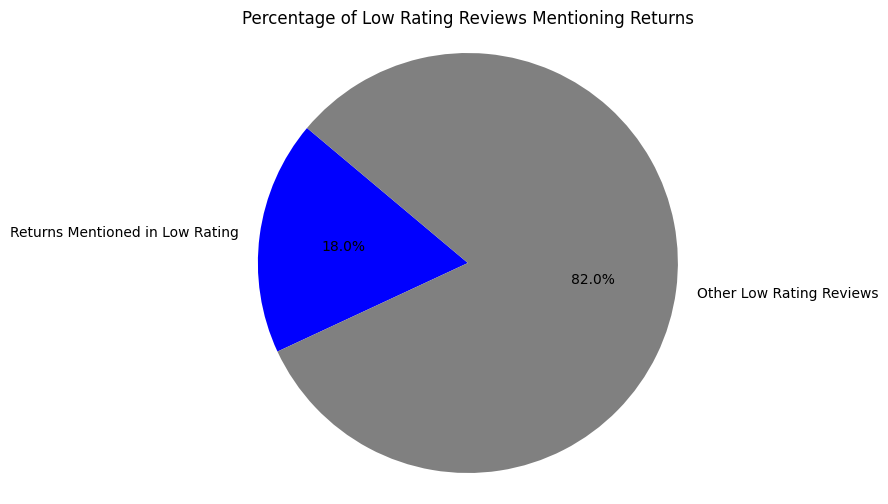

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Define common return/exchange mentions
return_keywords = ['return', 'exchange', 'refund', 'returned', 'exchanged', 'refunded']

# Function to classify return mentions
def classify_return_mentions(text):
    text = text.lower()
    for keyword in return_keywords:
        if keyword in text:
            return 'return_mentioned'
    return 'no_return_mentioned'

# Filter reviews with a rating below 3
low_rating_df = df[df['rating'] < 3]

# Apply function to classify return mentions in low rating reviews
low_rating_df['return_mention'] = low_rating_df['text'].apply(classify_return_mentions)

# Filter for reviews mentioning returns among low rating reviews
returns_in_low_rating_df = low_rating_df[low_rating_df['return_mention'] == 'return_mentioned']

# Calculate the number of low rating reviews mentioning returns
num_returns_in_low_rating = returns_in_low_rating_df.shape[0]

# Calculate the total number of low rating reviews
total_low_rating_reviews = low_rating_df.shape[0]

# Calculate the percentage of low rating reviews mentioning returns
percent_returns_in_low_rating = (num_returns_in_low_rating / total_low_rating_reviews) * 100

# Display the result
print(f"Percentage of low rating reviews mentioning returns: {percent_returns_in_low_rating:.2f}%")

# Plot the percentage of low rating reviews mentioning returns
plt.figure(figsize=(10, 6))
labels = ['Returns Mentioned in Low Rating', 'Other Low Rating Reviews']
sizes = [percent_returns_in_low_rating, 100 - percent_returns_in_low_rating]
colors = ['blue', 'grey']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Low Rating Reviews Mentioning Returns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [66]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [82]:
df = pd.read_csv('DogApparel.csv')

In [83]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
positive_words = []
negative_words = []

combined_texts = pd.concat([df['text'], df['title']])

for text in combined_texts:
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:  # Positive sentiment threshold
        positive_words.extend(text.split())
    elif scores['compound'] <= -0.05:  # Negative sentiment threshold
        negative_words.extend(text.split())

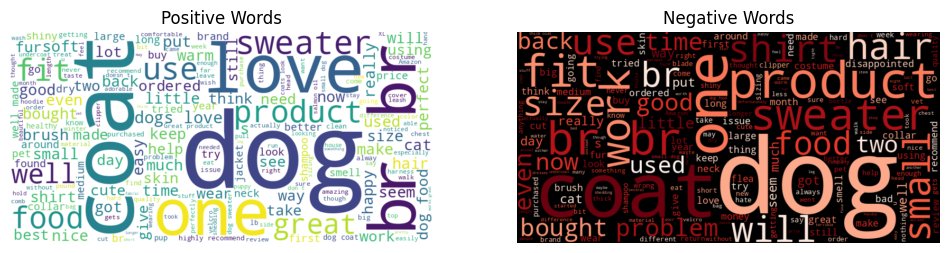

In [72]:
# Generate positive word cloud
positive_text = ' '.join(positive_words)
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate negative word cloud
negative_text = ' '.join(negative_words)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Display word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


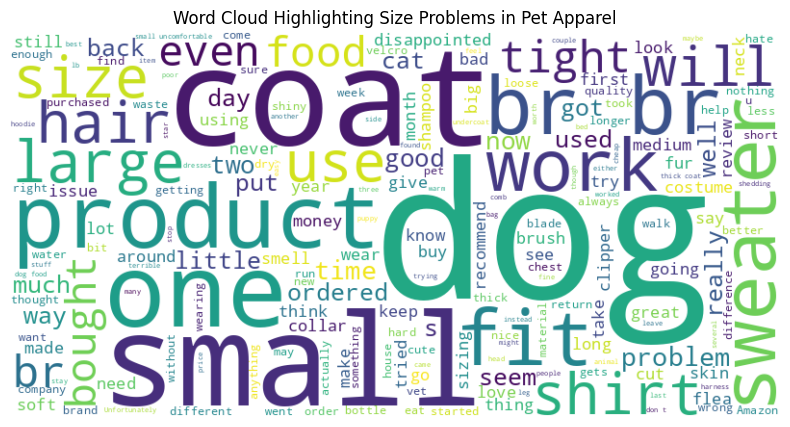

In [88]:
size_problems = [
    "too small", "too large", "doesn't fit", "too tight", "too loose", "short sleeves",
    "long sleeves", "too narrow", "too wide", "wrong length", "inaccurate sizing chart",
    "inconsistent sizes", "poor measurement guide", "fits poorly", "uncomfortable",
    "doesn't accommodate breed specifics", "difficult to adjust", "inadequate coverage"
]

# Initialize sentiment analyzer (optional for analysis, not used in this example)
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# List to hold size-related words
size_related_words = []
combined_texts = pd.concat([df['text'], df['title']])

for text in combined_texts:
    # Clean and tokenize the text
    text_cleaned = re.sub(r'\W+', ' ', text).lower()  # Remove non-word characters and lower case
    words = text_cleaned.split()

    # Check for size-related problems
    for problem in size_problems:
        if problem in text_cleaned:
            size_related_words.extend(problem.split())
# Convert frequencies to a format suitable for WordCloud
x=size_related_words+negative_words
size_related_word_freq_str = ' '.join([f'{word} ' for word in x])

# Generate size-related word cloud
size_related_wc = WordCloud(width=800, height=400, background_color='white', contour_color='black', contour_width=1).generate(size_related_word_freq_str)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(size_related_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Highlighting Size Problems in Pet Apparel')
plt.show()